In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
retail_data= pd.read_csv(r"retail_sales_dataset (1).csv")

In [4]:
retail_data.head()

,#VALUE!,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150,2023
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000,2023
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30,2023
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500,2023
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100,2023


In [5]:
retail_data.tail()

,#VALUE!,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50,2023
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90,2023
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100,2023
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150,2023
999,1000,12-04-2023,CUST1000,Male,47,Electronics,4,30,120,2023


In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #VALUE!           1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9           Year      1000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 78.3+ KB


In [11]:
retail_data.columns

Index(['#VALUE!', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount', '        Year'],
      dtype='object')

In [10]:
#the shape of the dataset
retail_data.shape

(1000, 10)

In [9]:
#checking any duplicates in data
retail_data.duplicated().sum()

0

In [8]:
#finding the NaN values in the dataset
retail_data.isna().sum()

#VALUE!             0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
        Year        0
dtype: int64

In [7]:
#statistical information about the dataset
retail_data.describe()

,#VALUE!,Age,Quantity,Price per Unit,Total Amount,Year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,2023.002000
std,288.819436,13.68143,1.132734,189.681356,559.997632,0.044699
min,1.000000,18.00000,1.000000,25.000000,25.000000,2023.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,2023.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,2023.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,2023.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2024.000000


In [12]:
#Checking The Unique Values in Dataset
for i in retail_data.columns.to_list():
    print(f' No of Unique Values in {i} => {retail_data[i].nunique()}')

 No of Unique Values in #VALUE! => 1000
 No of Unique Values in Date => 345
 No of Unique Values in Customer ID => 1000
 No of Unique Values in Gender => 2
 No of Unique Values in Age => 47
 No of Unique Values in Product Category => 3
 No of Unique Values in Quantity => 4
 No of Unique Values in Price per Unit => 5
 No of Unique Values in Total Amount => 18
 No of Unique Values in         Year => 2


In [35]:
# [' Replace space to underscore']
retail_data.columns=retail_data.columns.str.replace(' ','_')

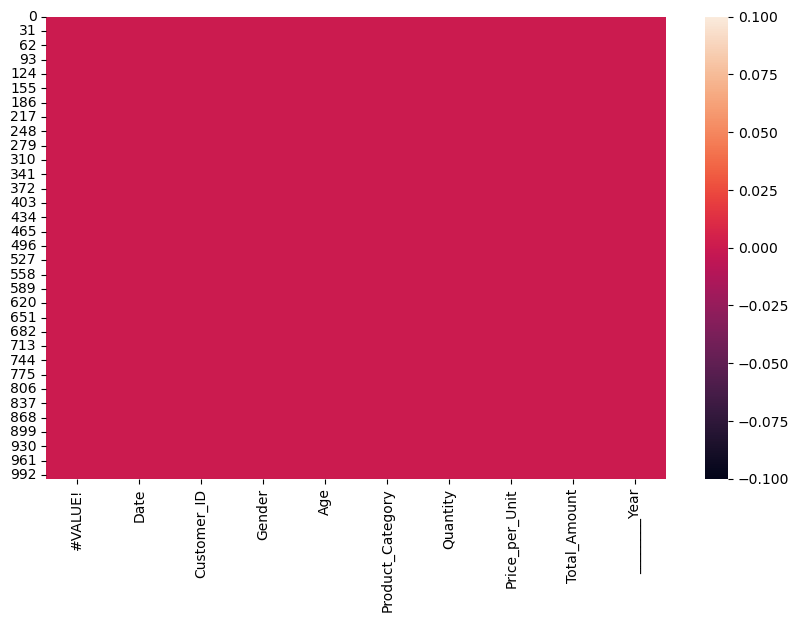

In [14]:
#plot the heatmap using seaborn 
plt.figure(figsize=(10, 6))
sns.heatmap(retail_data.isna());
plt.show()

In [19]:
#find The Numeric Columns in dataset
num_col=[]
for col in retail_data.columns:
    if retail_data[col].dtypes!='object':
        num_col.append(col)
num_col


['#VALUE!',
 'Age',
 'Quantity',
 'Price_per_Unit',
 'Total_Amount',
 '________Year']

In [20]:
#find The categorical Columns in dataset
num_col1=[]
for col in retail_data.columns:
    if retail_data[col].dtypes!='int64':
        num_col1.append(col)
num_col1

['Date', 'Customer_ID', 'Gender', 'Product_Category']

In [21]:
#make a copy of dataset
retail_data1=retail_data.copy()

In [22]:
#Adding Day,Year,and Month columns
retail_data1['Day']=retail_data1['Date'].str.split('-').str[2]
retail_data1['Year']=retail_data['Date'].str.split('-').str[0]

In [23]:
retail_data1['Date']=pd.to_datetime(retail_data1['Date'])

In [24]:
retail_data1['Month']=retail_data1['Date'].dt.month_name()

In [25]:
retail_data1.head()

,#VALUE!,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,________Year,Day,Year,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,2023,24,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2023,27,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,2023,13,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,2023,21,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,2023,06,May


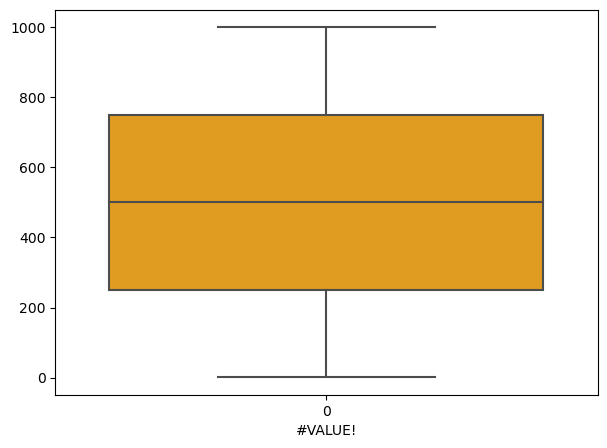

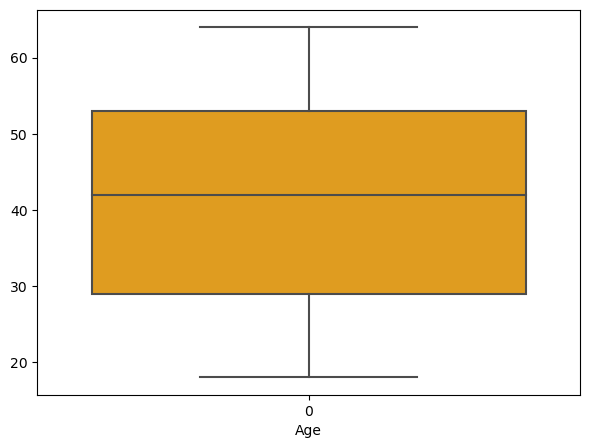

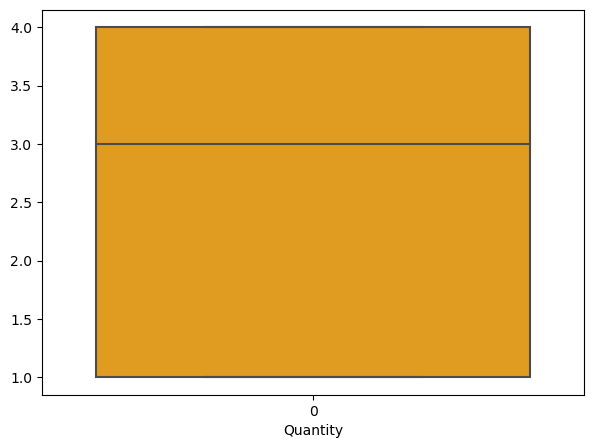

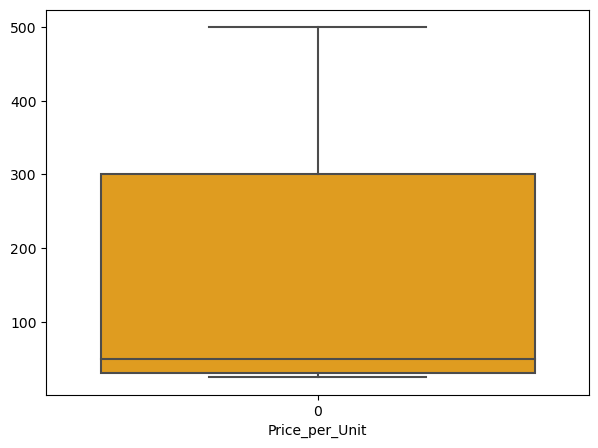

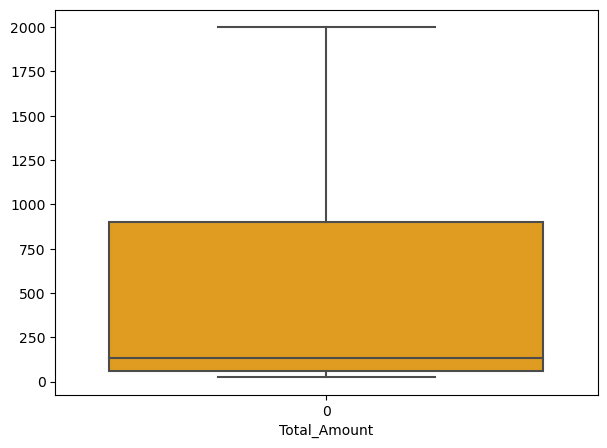

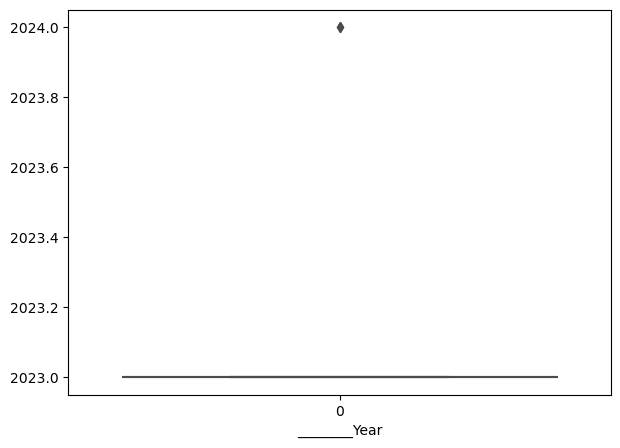

In [26]:
#finding Outliers
for col in retail_data.select_dtypes('int').columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(retail_data[col],color='Orange')
    plt.xlabel(col)
    plt.show()

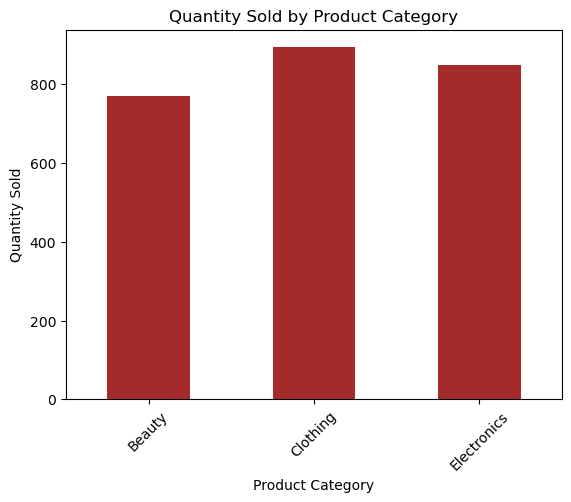

In [27]:
#Quantity Sold by Product Category
retail_data.groupby('Product_Category')['Quantity'].sum().plot(kind='bar',color='Brown')
plt.xticks(rotation=45)
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

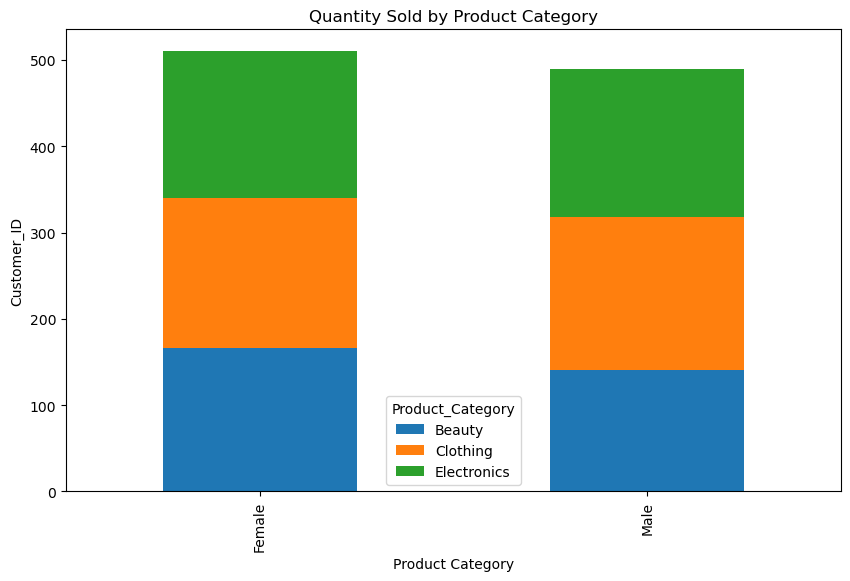

In [28]:
#Sales Distribution in Each Product Category by Gender
retail_data.groupby(['Gender','Product_Category'])['Customer_ID'].count().unstack().plot(kind='bar',stacked=True,figsize=(10,6));
plt.title('Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Customer_ID')
plt.show()

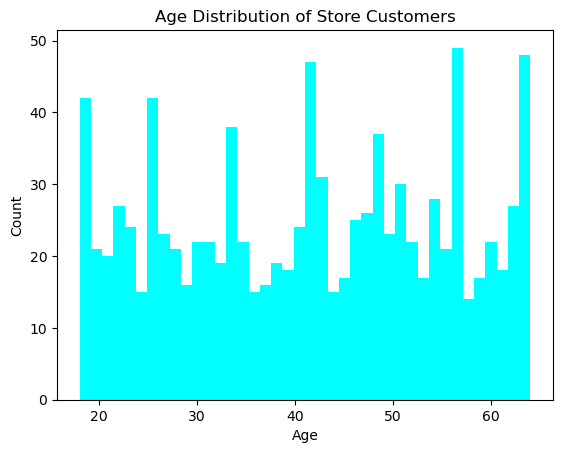

In [29]:
#age distribution of store customers
retail_data['Age'].plot(kind='hist', bins=40,color='Cyan')
plt.title('Age Distribution of Store Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

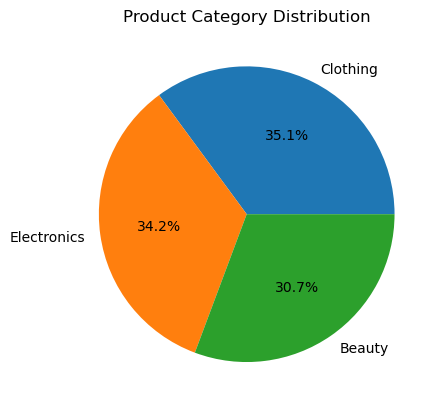

In [30]:
category_counts = retail_data['Product_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel(None)
plt.show()

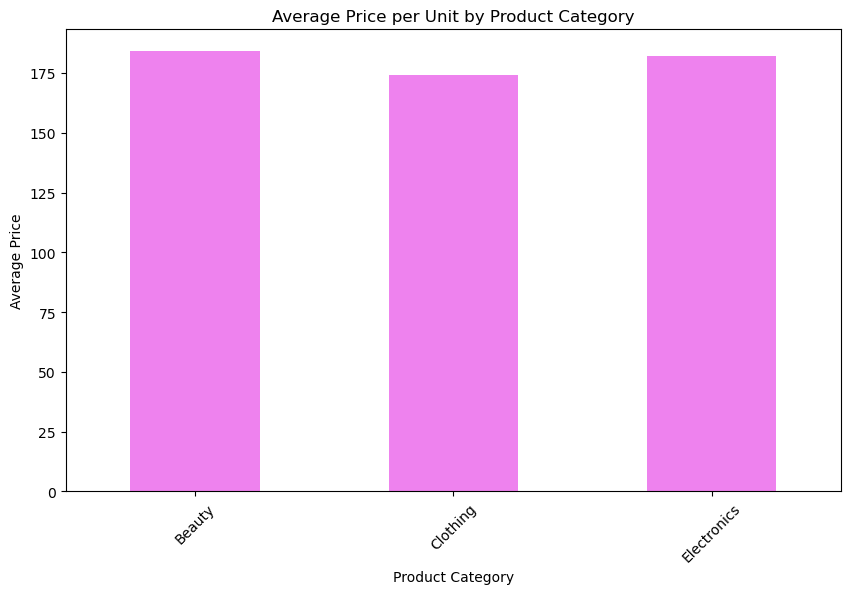

In [31]:
plt.figure(figsize=(10, 6))
retail_data.groupby('Product_Category')['Price_per_Unit'].mean().plot(kind='bar', color='Violet')
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [41]:
#transaction frequency over months
retail_data1['Num_Month'] = retail_data1['Date'].dt.month

In [43]:
transaction_count = retail_data1.groupby('Num_Month')['#VALUE!'].count()
transaction_count

Num_Month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: #VALUE!, dtype: int64

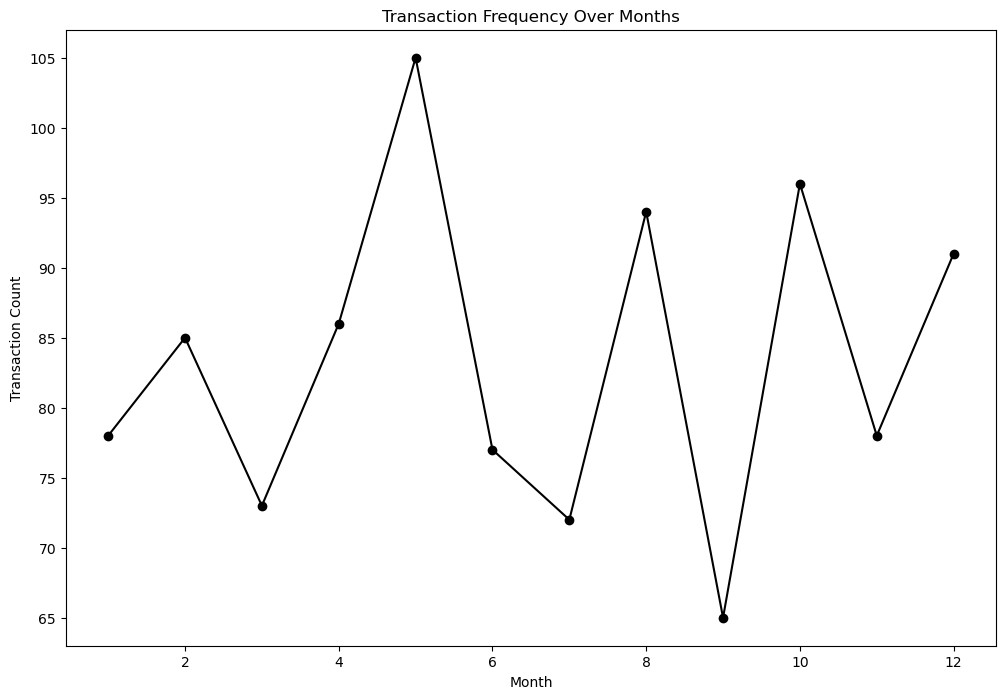

In [44]:
plt.figure(figsize=(12,8))
retail_data1.groupby('Num_Month')['#VALUE!'].count().plot(kind='line',marker='o', color='black', linestyle='-')
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

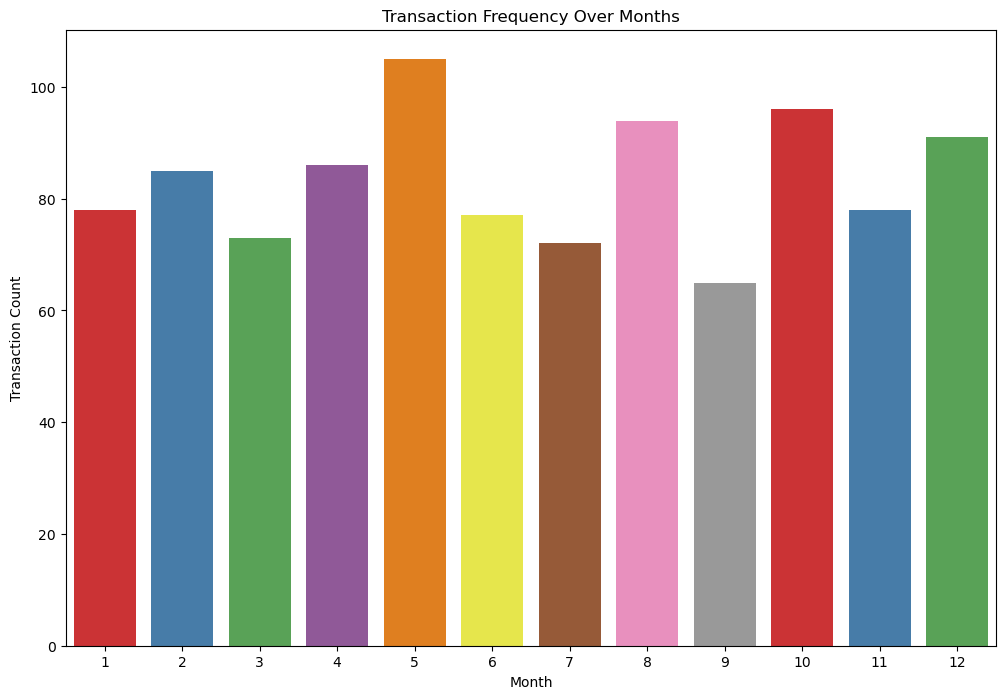

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values,palette="Set1")
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

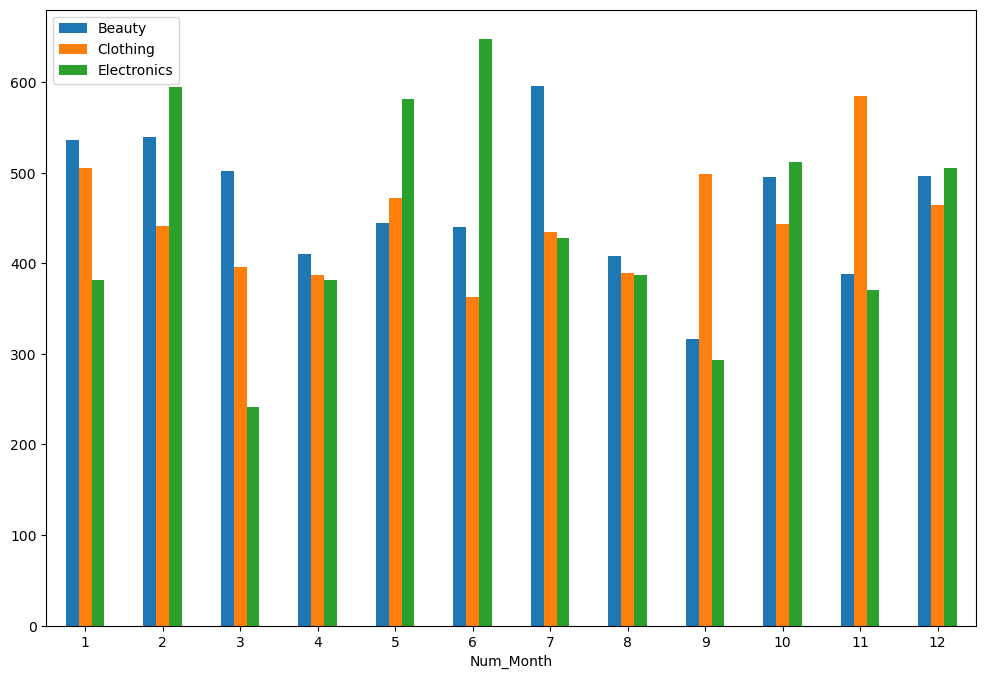

In [46]:
sales_per_cat = retail_data1.pivot_table(index='Num_Month', columns='Product_Category', values='Total_Amount')
sales_per_cat.plot(kind='bar',figsize=(12,8));
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [47]:
#Analyzing product quantity purchased by diffrent Age Group

# Dividing Age Group
age_bins = [0,18,25,35,50,100]
age_group = ['0-18','19-25','26-35','36-50','50+']
retail_data1['Age_Group'] = pd.cut(retail_data1['Age'], bins = age_bins, labels = age_group)
retail_data1.head()

,#VALUE!,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,________Year,Day,Year,Month,Num_Month,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,2023,24,November,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2023,27,February,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,2023,13,January,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,2023,21,May,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,2023,06,May,5,26-35


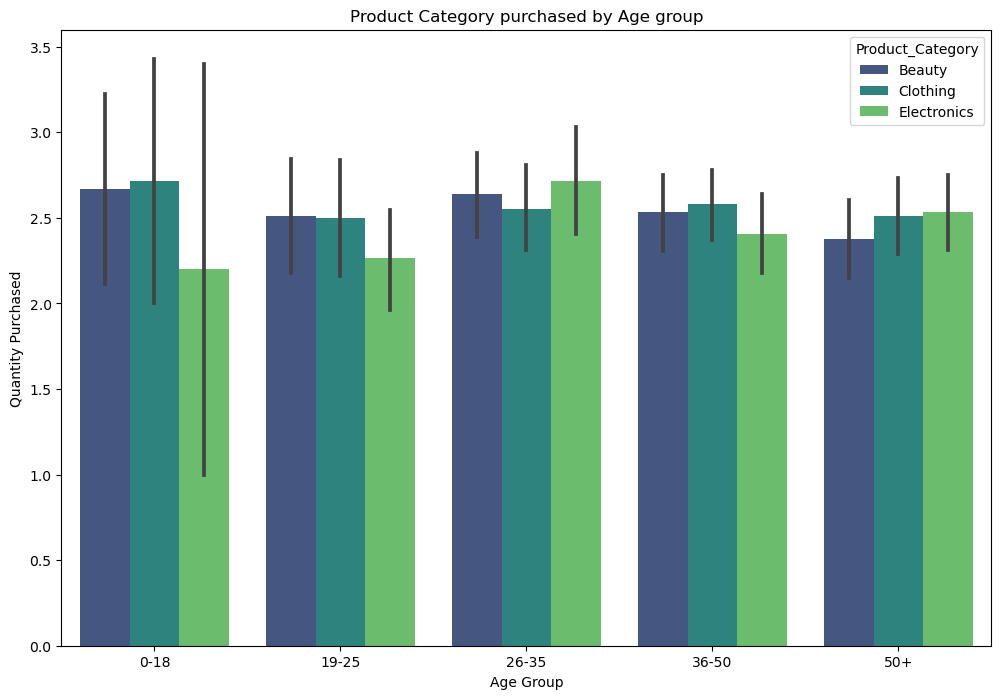

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age_Group', y='Quantity', hue='Product_Category', data= retail_data1,palette='viridis')
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

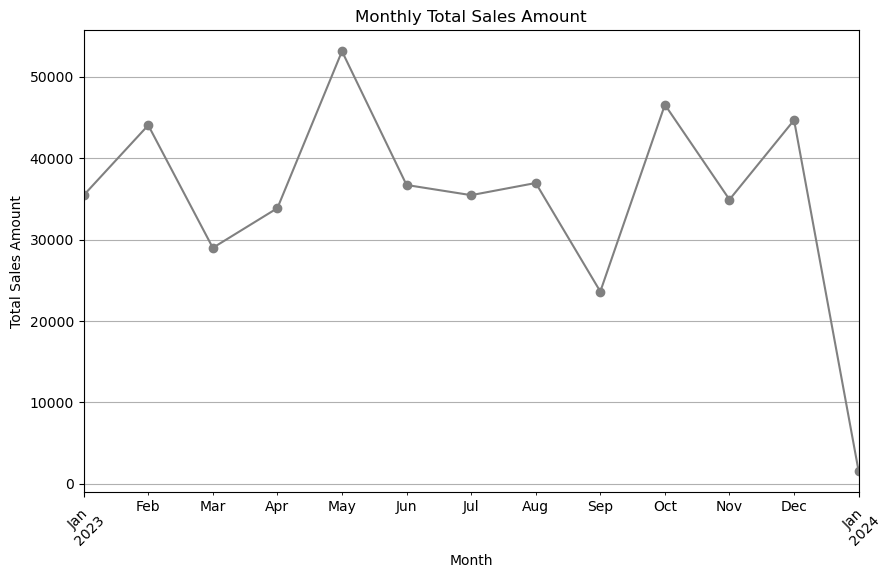

In [49]:
monthly_sales = retail_data1.groupby(retail_data1['Date'].dt.to_period('M'))['Total_Amount'].sum()

# Plot the time series data
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='Gray', linestyle='-')
plt.title('Monthly Total Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [50]:
retail_data1['DayName'] = retail_data1['Date'].dt.day_name()

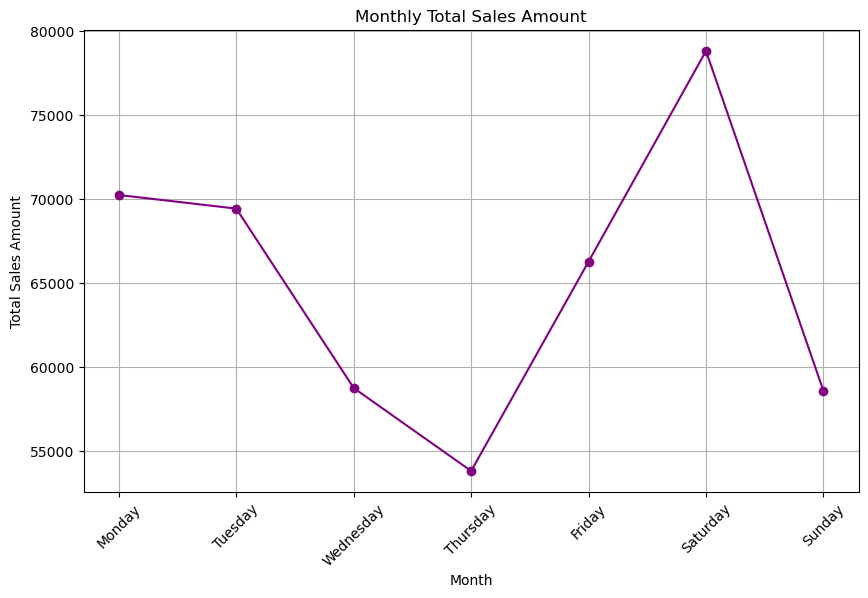

In [51]:
daily_sales = retail_data1.groupby(retail_data1['DayName'])['Total_Amount'].sum()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_of_week)
# Plot the time series data
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o', color='purple', linestyle='-')
plt.title('Monthly Total Sales Amount')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()